In [ ]:
print("Merhaba, İGÜ - İSTKA / Ders 9") # print ekrana çıktı veren bir koddur.

Merhaba, İGÜ - İSTKA / Ders 9


In [ ]:
import sys # import python programlama dilinde yazılıma kütüphane eklemeye yarayan bir kod blogudur.
print(sys.version)

3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]


In [ ]:
from google.colab import drive # google colab - drive bağlantısı

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

os.chdir('/content/drive/My Drive/VERIYAPILARI_ISTKA')

!pwd # bize kodun çıktısını dosya yolu olarak veren kod blogudur.

/content/drive/My Drive/VERIYAPILARI_ISTKA


## VERİ YAPILARI ve ALGORİTMALAR
# Sıralama, Arama ve Graf Algoritmaları



In [ ]:
import pandas as pd

VeriSetiYolu = '/content/drive/My Drive/VERIYAPILARI_ISTKA/algveriseti'

for file in os.listdir(VeriSetiYolu):                         # Klasördeki tüm dosyaları listele

    if file.endswith(('.xlsx', '.xls')):                     # Sadece Excel dosyalarını seç

        df = pd.read_excel(os.path.join(VeriSetiYolu, file))  # Excel dosyasını pandas ile oku

        df.to_csv(os.path.join(VeriSetiYolu, file.rsplit('.', 1)[0] + '.csv'), index=False)
                                                               # DataFrame'i CSV formatında kaydet
        print(f"{file} dosyası CSV formatına çevrildi.")     # Çevrim İşlemi Çıktısı

# İşlem tamamlandığında kaç tane excel dosyası var ise o kadar *.csv formatına çevildiğinin
# bilgisini almaktayız

In [ ]:
import os
import pandas as pd

VeriSetiYolu = '/content/drive/My Drive/VERIYAPILARI_ISTKA/algveriseti'

# VeriSetiYolu içindeki .csv dosyalarını bul ve say
csv_dosyaları = [dosya for dosya in os.listdir(VeriSetiYolu) if dosya.endswith('.csv')]

# .csv dosya sayısını ekrana yazdır
csv_dosya_sayisi = len(csv_dosyaları)
print(f"VeriSetiYolu içerisinde {csv_dosya_sayisi} tane .csv dosyası bulunuyor.")

VeriSetiYolu içerisinde 1 tane .csv dosyası bulunuyor.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV dosyasını oku
dosya_yolu = '/content/drive/My Drive/VERIYAPILARI_ISTKA/algveriseti/ilcesuveriseti.csv'
csv_dosya = pd.read_csv(dosya_yolu)

print(csv_dosya)

   ID;ILCELER;2015;2016;2017;2018;2019;2020;2021;2022
0   1;ADALAR;1.432.494;1.472.276;1.366.581;1.399.1...
1   2;ARNAVUTKOY;8.002.123;9.178.953;10.176.132;11...
2   3;ATASEHIR;18.597.049;19.974.097;21.205.911;21...
3   4;AVCILAR;16.220.476;17.052.253;17.558.403;18....
4   5;BUYUKCEKMECE;9.915.435;10.788.924;11.172.787...
5   6;BAHCELIEVLER;23.610.609;24.320.533;24.868.59...
6   7;BAKIRKOY;11.510.117;11.793.169;12.509.301;15...
7   8;BAYRAMPASA;11.545.682;11.914.393;12.516.185;...
8   9;BAGCILAR;26.691.720;28.182.511;29.362.186;31...
9   10;BASAKSEHIR;16.174.934;18.100.255;19.576.095...
10  11;BEYKOZ;10.254.740;10.891.434;11.331.655;12....
11  12;BEYLIKDUZU;12.346.365;13.630.387;14.948.006...
12  13;BEYOGLU;11.167.382;11.311.755;11.420.559;12...
13  14;BESIKTAS;11.976.186;12.385.216;12.609.953;1...
14  15;ESENLER;15.854.265;16.584.976;17.162.651;17...
15  16;ESENYURT;27.933.397;32.799.007;36.083.030;3...
16  17;EYUPSULTAN;17.116.911;17.901.848;18.222.331...
17  18;FATIH;22.358.121;21.7

In [ ]:
# Veri setinin yolunun gösterimi ve yüklemesi
VeriSetiYolu = '/content/drive/My Drive/VERIYAPILARI_ISTKA/algveriseti/ilcesuveriseti.csv'
data = pd.read_csv(VeriSetiYolu, delimiter=';')

# ; verilerini temizleyip , verisini dönüştürme işlemidir.
for i in data.columns[2:]:
    data[i] = data[i].str.replace('.', '').astype(int)

print(data.head())

   ID       ILCELER      2015      2016      2017      2018      2019  \
0   1        ADALAR   1432494   1472276   1366581   1399182   1371291   
1   2    ARNAVUTKOY   8002123   9178953  10176132  11404878  13818204   
2   3      ATASEHIR  18597049  19974097  21205911  21496185  22428468   
3   4       AVCILAR  16220476  17052253  17558403  18312736  19485453   
4   5  BUYUKCEKMECE   9915435  10788924  11172787  12222470  13606571   

       2020      2021      2022  
0   1513070   1435991   1543403  
1  15570466  17102127  18891299  
2  23737630  24281319  24377611  
3  20824893  20690506  21556002  
4  16015731  16167480  17412198  


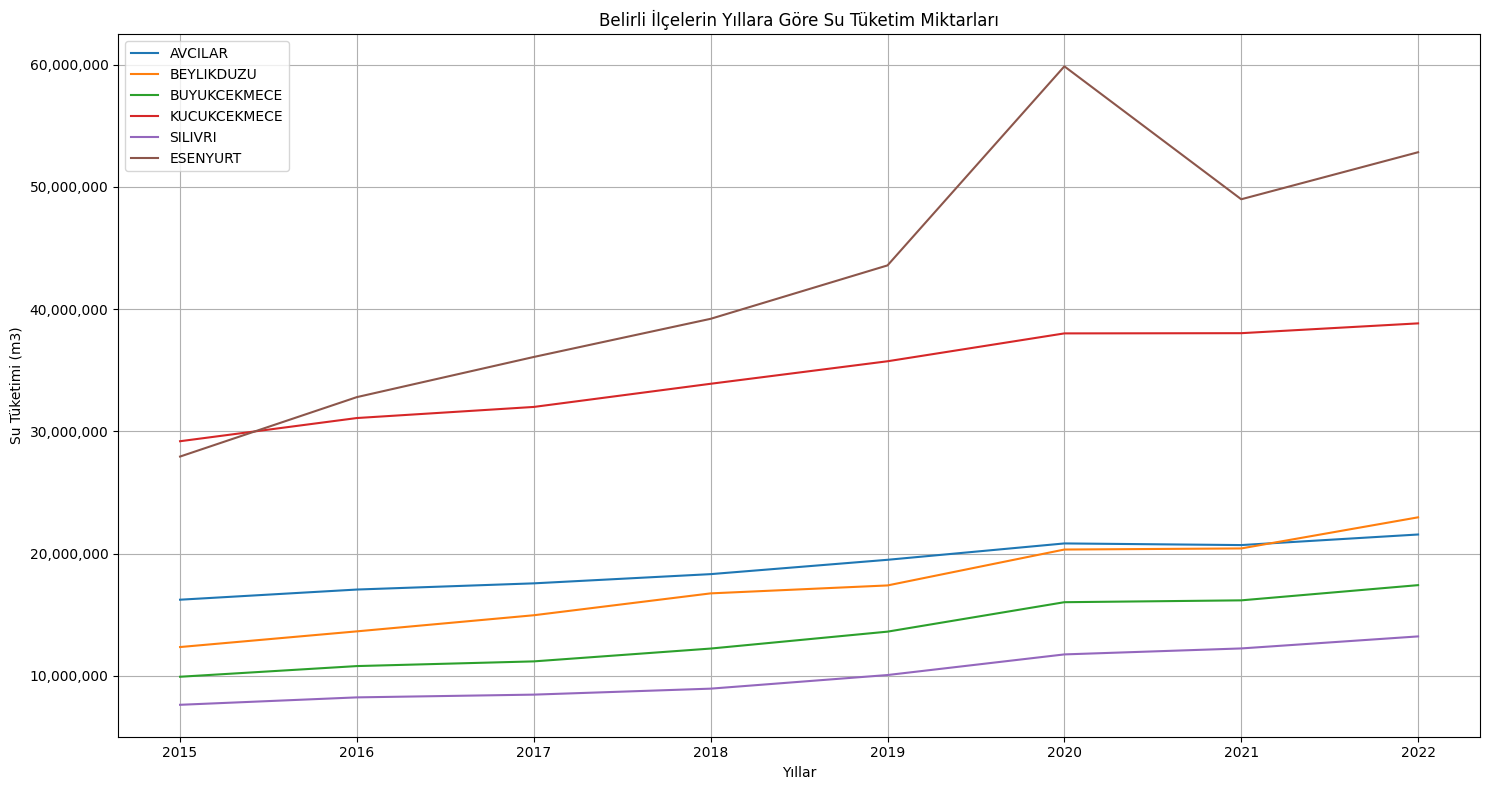

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Veri setini yükleme ve temizleme
data = pd.read_csv(VeriSetiYolu, delimiter=';')

# Sayısal kolonlardaki verileri temizleyip sayıya dönüştürme
for i in data.columns[2:]:
    data[i] = data[i].str.replace('.', '').astype(int)

# Belirtilen ilçeler için veriyi filtreleme
ilceler = ["AVCILAR", "BEYLIKDUZU", "BUYUKCEKMECE", "KUCUKCEKMECE", "SILIVRI", "ESENYURT"]
filtre = data[data['ILCELER'].isin(ilceler)]

# Seçilen ilçeler için yıllık su tüketim miktarlarını çizme
plt.figure(figsize=(15, 8))

for ilce in ilceler:
    ilce_data = filtre[filtre['ILCELER'] == ilce]
    plt.plot(data.columns[2:], ilce_data.iloc[0, 2:], label=ilce)

plt.xlabel('Yıllar')
plt.ylabel('Su Tüketimi (m3)')
plt.title('Belirli İlçelerin Yıllara Göre Su Tüketim Miktarları')

# Y eksenine binlik ayırıcı ekleme
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Su veri seti üzerinin görselleştirilmesinde graph ve plot ekleme ile görselin detaylandırılması - plotly Kütüphane Kurulum İşlemi !pip install plotly


In [ ]:
!pip install plotly

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Veri setini yükleme ve temizleme
data = pd.read_csv(VeriSetiYolu, delimiter=';')

# Sayısal kolonlardaki verileri temizleyip sayıya dönüştürme
for i in data.columns[2:]:
    data[i] = data[i].str.replace('.', '').astype(int)

# Belirtilen ilçeler için veriyi filtreleme
ilce_bilgileri = ["AVCILAR", "BEYLIKDUZU", "BUYUKCEKMECE", "KUCUKCEKMECE", "SILIVRI", "ESENYURT"]
filtre = data[data['ILCELER'].isin(ilce_bilgileri)]

# Plotly kullanarak interaktif grafik oluşturma
fig = go.Figure()

for ilce in ilce_bilgileri:
    ilce_data = filtre[filtre['ILCELER'] == ilce]
    fig.add_trace(go.Scatter(
         x=data.columns[2:],
         y=ilce_data.iloc[0, 2:],
         mode='lines+markers',
         line=dict(width=3),
         name=ilce
        ))

fig.update_layout(
        title='AVCILAR, BEYLIKDUZU, BUYUKCEKMECE, KUCUKCEKMECE, SILIVRI, ESENYURT İlçelerin Yıllara Göre Su Tüketim Miktarları',
        xaxis_title='Yıllar',
        yaxis_title='Su Tüketimi (m3)',
        yaxis=dict(tickformat=','),
        template='plotly_white'
)

fig.show()

## SIRALAMA ALGORİTMALARI

1. Kabarcık (Bubble) Sıralama Algoritması -> Dizi içerisinde ardışık öğeler karşılaştırılır ve gerektiğinde yer değiştirir.

2. Seçim (Selection) Sıralama Algoritması -> En küçük veya en büyük öğeyi seçip, onu listenin sonuna yerleştirme işlemidir.

3. Insertion (Eklemeli) Sıralama Algoritması -> Veriyi sırayla ele alır ve her yeni öğeyi sıralanmış bir alt listeye ekleme işlemidir.

4. Kova (Bucket) Sıralama Algoritması -> Veriyi birden çok kısmi gruba ayırarak sıralar.

5. Birleştirmeli (Merge) Sıralama Algoritması -> Böl ve yönet işlemi gerçekleştirilir.

6. Hızlı (Quick) Sıralama Algoritması -> Böl ve yönet işlemi gerçekleştirilir.

In [ ]:
# 1. Kabarcık (Bubble) Sıralama Algoritması

dizi = [64, 34, 90, 1]

def kabarcikalgoritmasi(dizi):
    n = len(dizi)  # 1. Adım: Dizinin uzunluğunu alır ve n değişkenine atar.
    for i in range(n):  # 2. Adım: i değişkeni 0'dan n-1'e kadar döner, bu dış döngüdür.
        for j in range(0, n-i-1):  # 3. Adım: j değişkeni, 0'dan n-i-1'e kadar döner, bu iç döngüdür.
            if dizi[j] > dizi[j+1]:  # 4. Adım: Şu anki eleman ile bir sonraki elemanı karşılaştırır.
               dizi[j], dizi[j+1] = dizi[j+1], dizi[j]  # 5. Adım: Eğer şu anki eleman bir sonrakinden büyükse, yer değiştirir.
    return dizi  # 6. Adım: Sıralanmış diziyi döner.

kabarcik_siralama = kabarcikalgoritmasi(dizi)
print("Sıralama Sonucu: ", kabarcik_siralama)

Sıralama Sonucu:  [1, 34, 64, 90]


## Başlangıç Dizisi: [64, 34, 90, 1]

1) i = 0 durumunda

Adım 1: 64 ve 34 karşılaştırılır. 64 büyük olduğu için yer değiştirirler.

Dizinin Yeni Hali -> [34, 64, 90, 1]
-------------------------------------------------------------------------------
Adım 2: 64 ve 90 karşılaştırılır. 64 küçük olduğu için yer değiştirme olmaz.

Dizinin Yeni Hali -> [34, 64, 90, 1]
-------------------------------------------------------------------------------
Adım 3: 90 ve 1 karşılaştırılır. 90 büyük olduğu için yer değiştirirler.

Dizinin Yeni Hali -> [34, 64, 1, 90]

-------------------------------------------------------------------------------
-------------------------------------------------------------------------------

2) i = 1 durumunda

Adım 1: 34 ve 64 karşılaştırılır. 34 küçük olduğu için yer değiştirme olmaz.

Dizinin Yeni Hali -> [34, 64, 1, 90]
-------------------------------------------------------------------------------
Adım 2: 64 ve 1 karşılaştırılır. 64 büyük olduğu için yer değiştirirler.

Dizinin Yeni Hali -> [34, 1, 64, 90]

-------------------------------------------------------------------------------
-------------------------------------------------------------------------------

3) i = 2 durumunda

Adım 1: 34 ve 1 karşılaştırılır. 34 büyük olduğu için yer değiştirirler.

Dizinin Yeni Hali -> [1, 34, 64, 90]

-------------------------------------------------------------------------------
-------------------------------------------------------------------------------

4) i = 3 durumunda

Kalan tek eleman zaten sıralı olduğu için hiçbir işlem yapılmaz.

Dizinin Son Hali -> [1, 34, 64, 90]


In [ ]:
# 2. Seçim (Selection) Sıralama Algoritması

dizi = [64, 34, 90, 1]

def secimalgoritmasi(dizi):
    n = len(dizi)  # 1. Adım: Dizinin uzunluğunu alır ve 'n' değişkenine atar.
    for i in range(n):  # 2. Adım: 'i' değişkeni 0'dan n-1'e kadar döner. Bu dış döngüdür ve dizinin her öğesini sırasıyla ele alır.
        degisken = i  # 3. Adım: Şu anki döngüdeki en küçük elemanın indeksini 'degisken' olarak kabul eder. Başlangıçta 'i' indeksini alır.
        for j in range(i+1, n):  # 4. Adım: 'j' değişkeni, 'i+1'den n'e kadar döner. Bu iç döngüdür ve 'i'nin sağındaki elemanları tarar.
            if dizi[j] < dizi[degisken]:  # 5. Adım: Eğer 'dizi[j]' değeri 'dizi[degisken]' değerinden küçükse,
                degisken = j  # 6. Adım: 'degisken' güncellenir ve yeni minimum değerin bulunduğu indeks olarak atanır.
        dizi[i], dizi[degisken] = dizi[degisken], dizi[i]  # 7. Adım: 'degisken' ile 'i' indeksi arasındaki elemanlar yer değiştirilir.

    return dizi  # 8. Adım: Sıralanmış diziyi döner.

# Test
secimsiralamasi = secimalgoritmasi(dizi)
print("Sıralama Sonucu:", secimsiralamasi)

Sıralama Sonucu: [1, 34, 64, 90]


## Başlangıç Dizisi: [64, 34, 90, 1]

# 1) i = 0 durumunda

Adım 1: degisken değişkeni i = 0 olarak başlar, yani başlangıçta en küçük elemanın indeksi 0 kabul edilir (degisken = 0).

Adım 2: j = 1 için, 34 < 64 olduğundan, degisken = 1 olarak güncellenir.

Adım 3: j = 2 için, 90 < 34 olmadığından degisken değişmez.

Adım 4: j = 3 için, 1 < 34 olduğundan, degisken = 3 olarak güncellenir.

Adım 5: degisken = 3 ile i = 0 arasında yer değiştirilir. 1 ile 64 yer değiştirir.

Dizinin Yeni Hali -> [1, 34, 90, 64]

Not: Bu iterasyonun sonunda en küçük değer (1) dizinin başına yerleşmiş olur.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# 2) i = 1 durumunda

Adım 1: degisken değişkeni i = 1 olarak başlar, yani en küçük elemanın indeksi 1 kabul edilir (degisken = 1).

Adım 2: j = 2 için, 90 < 34 olmadığından degisken değişmez.

Adım 3: j = 3 için, 64 < 34 olmadığından degisken değişmez.

Adım 4: degisken değişmediği için yer değiştirme yapılmaz.

Dizinin Yeni Hali -> [1, 34, 90, 64]

Not: Bu iterasyonun sonunda dizinin ikinci en küçük değeri (34) yerinde kalır.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# 3) i = 2 durumunda

Adım 1: degisken değişkeni i = 2 olarak başlar (degisken = 2).

Adım 2: j = 3 için, 64 < 90 olduğundan, degisken = 3 olarak güncellenir.

Adım 3: degisken = 3 ile i = 2 arasında yer değiştirilir. 64 ile 90 yer değiştirir.

Dizinin Yeni Hali -> [1, 34, 64, 90]

Not: Bu iterasyonun sonunda dizinin üçüncü en küçük değeri (64) yerleşmiş olur.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# 4) i = 3 durumunda

Adım 1: Sıralı süreç sağlandı hiçbir işlem yapılmaz.

Dizinin son hali -> [1, 34, 64, 90]

In [ ]:
# 3. Insertion (Eklemeli) Sıralama Algoritması

dizi = [64, 34, 90, 1]

def eklemelialgoritma(dizi):
    for i in range(1, len(dizi)):  # 1. Adım: 'i' değişkeni 1'den başlayarak dizinin sonuna kadar döner.
        degisken = dizi[i]  # 2. Adım: 'degisken' değişkeni, şu anda incelenen elemanı tutar.
        j = i-1  # 3. Adım: 'j' değişkeni, 'i' indeksinin bir öncesindeki indeksi gösterir.

        while j >= 0 and degisken < dizi[j]:  # 4. Adım: 'degisken', 'dizi[j]'den küçük olduğu sürece ve 'j' 0'dan büyük ya da eşit olduğu sürece döngü devam eder.
            dizi[j + 1] = dizi[j]  # 5. Adım: 'dizi[j]' değerini bir sağa kaydırır.
            j -= 1  # 6. Adım: 'j' indeksini bir azaltır ve döngü devam eder.

        dizi[j + 1] = degisken  # 7. Adım: 'degisken' değişkenini dizi içerisine yerleştirir.

    return dizi  # 8. Adım: Sıralanmış diziyi döner.

eklemelisiralama = eklemelialgoritma(dizi)
print("Secim Sıralaması:", eklemelisiralama)

Secim Sıralaması: [1, 34, 64, 90]


## Başlangıç Dizisi: [64, 34, 90, 1]

# 1) i = 1 durumunda

Adım 1: degisken = dizi[i] = 34

Adım 2: j = i - 1 = 0

Adım 3: dizi[j] = 64

Adım 4: 34 < 64, bu yüzden dizi[j + 1] = dizi[j] olur:

Dizi: [64, 64, 90, 1]

Adım 5: j -= 1 ile j = -1 olur, döngü biter.

Adım 6: dizi[j + 1] = degisken olur, 34 yerine yerleştirilir:

Dizi: [34, 64, 90, 1]

Not: İlk iki eleman (34 ve 64) doğru sıralanmış olur.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# 2) i = 2 durumunda

Adım 1: degisken = dizi[i] = 90

Adım 2: j = i - 1 = 1

Adım 3: dizi[j] = 64

Adım 4: 90 > 64, bu yüzden döngü devam etmez.

Adım 5: dizi[j + 1] = degisken olduğu gibi kalır:

Dizi: [34, 64, 90, 1]

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# 3) i = 3 durumunda

Adım 1: degisken = dizi[i] = 1

Adım 2: j = i - 1 = 2

Adım 3: dizi[j] = 90

Adım 4: 1 < 90, bu yüzden dizi[j + 1] = dizi[j] olur:

Dizi: [34, 64, 90, 90]

Adım 5: j -= 1 ile j = 1 olur.

Adım 6: dizi[j] = 64

Adım 7: 1 < 64, bu yüzden dizi[j + 1] = dizi[j] olur:

Dizi: [34, 64, 64, 90]

Adım 8: j -= 1 ile j = 0 olur.

Adım 9: dizi[j] = 34

Adım 10: 1 < 34, bu yüzden dizi[j + 1] = dizi[j] olur:

Dizi: [34, 34, 64, 90]

Adım 11: j -= 1 ile j = -1 olur, döngü biter.

Adım 12: dizi[j + 1] = degisken olur, 1 doğru yerine yerleştirilir:

Dizi: [1, 34, 64, 90]

Dizinin son hali -> [1, 34, 64, 90].

In [ ]:
# Su veri seti üzerinde sıralama algoritmasının uygulanması örneği:

import pandas as pd

# Veri setini okuyalım
file_path = '/content/drive/My Drive/VERIYAPILARI_ISTKA/algveriseti/ilcesuveriseti.csv'
df = pd.read_csv(file_path, sep=';')

# Veri setinin ilk birkaç satırına göz atalım
print(df.head())

# Selection Sort Uygulaması
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j][1] < arr[min_idx][1]:
                min_idx = j
        # Sadece elemanları sıralamak için değil, aynı zamanda ilçe isimlerini de yer değiştirmeliyiz
        arr[i][1], arr[min_idx][1] = arr[min_idx][1], arr[i][1]  # Su tüketimi sıralama
        arr[i][0], arr[min_idx][0] = arr[min_idx][0], arr[i][0]  # İlçe isimlerini de sıralama
    return arr

# 2022 yılı verileri üzerinde Selection Sort uygulayalım
df_selection_sort = df[['ILCELER', '2022']].copy()
df_selection_sort['2022'] = df_selection_sort['2022'].str.replace('.', '').astype(int)
df_selection_sort = df_selection_sort.to_numpy()
sorted_selection = selection_sort(df_selection_sort)
sorted_selection_df = pd.DataFrame(sorted_selection, columns=['ILCELER', '2022'])

# Sıralanmış veri çerçevesini ekrana yazdıralım
print(sorted_selection_df)

   ID       ILCELER        2015        2016        2017        2018  \
0   1        ADALAR   1.432.494   1.472.276   1.366.581   1.399.182   
1   2    ARNAVUTKOY   8.002.123   9.178.953  10.176.132  11.404.878   
2   3      ATASEHIR  18.597.049  19.974.097  21.205.911  21.496.185   
3   4       AVCILAR  16.220.476  17.052.253  17.558.403  18.312.736   
4   5  BUYUKCEKMECE   9.915.435  10.788.924  11.172.787  12.222.470   

         2019        2020        2021        2022  
0   1.371.291   1.513.070   1.435.991   1.543.403  
1  13.818.204  15.570.466  17.102.127  18.891.299  
2  22.428.468  23.737.630  24.281.319  24.377.611  
3  19.485.453  20.824.893  20.690.506  21.556.002  
4  13.606.571  16.015.731  16.167.480  17.412.198  
         ILCELER      2022
0         ADALAR   1543403
1           SILE   4247815
2        CATALCA   4961608
3        SILIVRI  13216660
4     BAYRAMPASA  14188089
5         BEYKOZ  14201827
6       GUNGOREN  14305999
7    SULTANBEYLI  14450593
8       CEKMEKOY  